# Paper ST Sloping - 8 beats

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.metrics import specificity_score
import random
import time

In [2]:
THREADS_TO_USE = 4

## Load dataset

In [3]:
data = pd.read_csv('../dataset/st_dataset_8beats.csv')
data = data.dropna()
data.head()

,id,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,...,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16,label
0,e0106,30.571581,30.571114,30.597163,8.654545,1.254944,0.902949,-0.773465,-1.399254,-0.734867,...,-0.052333,0.042084,-0.051954,0.052820,-0.078516,0.018113,-0.033035,-0.008121,-0.004387,NSR
1,e0106,35.327463,37.090233,36.619925,10.318908,1.501561,0.936195,-0.694743,-1.301387,-0.880195,...,-0.025711,0.004880,-0.014158,0.033816,-0.052615,-0.010039,-0.020460,-0.003424,-0.010776,NSR
2,e0106,33.754220,34.253945,34.112950,9.653801,1.420377,0.922050,-0.707779,-1.271389,-0.778260,...,-0.041095,0.024671,-0.028207,0.045623,-0.069928,-0.007982,-0.010177,-0.011244,-0.007525,NSR
3,e0106,33.428166,32.277378,32.154651,9.225828,1.332695,0.898518,-0.728415,-1.302251,-0.708089,...,-0.053417,0.034100,-0.041100,0.034451,-0.060591,-0.005673,-0.010582,-0.020471,0.001472,NSR
4,e0106,34.438584,33.565638,33.382364,9.589036,1.426830,0.886530,-0.727896,-1.310174,-0.910833,...,-0.077430,0.064301,-0.063539,0.066193,-0.087852,0.018333,-0.028678,-0.022301,0.009486,NSR


In [4]:
data['label'].replace("ST-", "ST", inplace=True)
data['label'].replace("ST+", "ST", inplace=True)

In [5]:
data['label'].value_counts()

NSR    52426
ST     15929
Name: label, dtype: int64

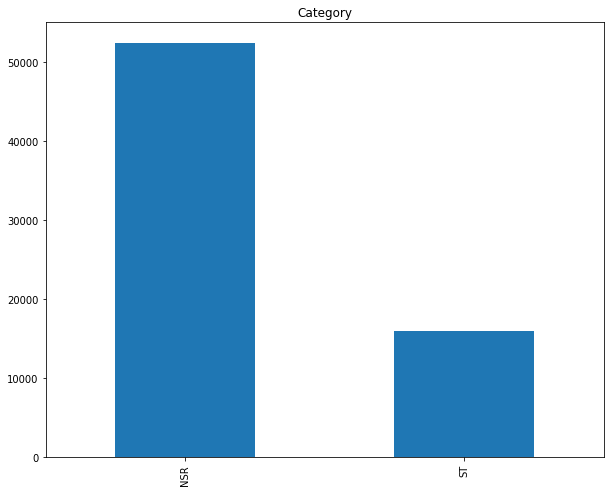

In [6]:
data['label'].value_counts().plot(kind='bar', title='Category', figsize=(10,8))
plt.show()

In [7]:
data.corr()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16
dw_1,1.000000,0.232673,0.111713,0.079107,0.076764,0.077147,-0.018860,0.030559,0.040220,-0.014666,...,-0.053028,-0.055461,-0.025675,-0.018685,-0.009704,-0.039241,-0.027948,-0.044903,-0.065581,-0.044688
dw_2,0.232673,1.000000,0.839282,0.452814,0.160598,0.424152,-0.484394,-0.404156,0.100065,0.435652,...,-0.136686,0.140104,0.232989,0.166906,0.045325,0.029218,0.115506,-0.000752,-0.115788,-0.079295
dw_3,0.111713,0.839282,1.000000,0.631576,0.240584,0.301445,-0.535593,-0.534332,-0.030329,0.564342,...,-0.206789,0.121560,0.266346,0.117884,-0.049549,0.051187,0.045371,-0.026800,-0.130477,-0.049044
dw_4,0.079107,0.452814,0.631576,1.000000,0.895025,0.016860,-0.237619,-0.260776,-0.029358,0.299563,...,-0.147248,0.048851,0.116574,0.042862,-0.044403,0.042171,0.026140,-0.032931,-0.089245,-0.033579
dw_5,0.076764,0.160598,0.240584,0.895025,1.000000,-0.105960,-0.011988,-0.035024,-0.012480,0.061799,...,-0.066765,0.004155,0.014207,0.013282,-0.012686,0.016035,0.013783,-0.034165,-0.041855,-0.018000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfr_12,-0.039241,0.029218,0.051187,0.042171,0.016035,-0.094790,0.068312,0.129263,0.122377,-0.090957,...,-0.127261,-0.207625,-0.097674,0.019114,0.057081,1.000000,0.003281,-0.017734,-0.318789,-0.208539
cfr_13,-0.027948,0.115506,0.045371,0.026140,0.013783,0.077604,-0.004769,0.006963,0.049874,0.008203,...,0.128357,0.032112,-0.217503,-0.271096,-0.046139,0.003281,1.000000,0.186633,0.097077,-0.171867
cfr_14,-0.044903,-0.000752,-0.026800,-0.032931,-0.034165,0.032269,0.017775,0.034991,0.012523,-0.020623,...,0.096622,0.214725,0.044225,-0.177405,-0.291133,-0.017734,0.186633,1.000000,0.157260,-0.146906
cfr_15,-0.065581,-0.115788,-0.130477,-0.089245,-0.041855,0.009040,0.083235,0.080419,-0.058850,-0.098386,...,0.258472,0.163393,-0.078272,-0.146256,-0.095566,-0.318789,0.097077,0.157260,1.000000,0.229510


In [8]:
y = data['label'].values
X = data.loc[:, ~data.columns.isin(["id", "label"])].copy()

In [9]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

## Feature selection

### Exclude features with corr > 0.95

In [10]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [11]:
print(correlated_features)

{'fft_199', 'fft_242', 'fft_241', 'fft_143', 'fft_152', 'fft_248', 'fft_179', 'fft_216', 'fft_145', 'fft_144', 'fft_229', 'fft_239', 'fft_193', 'fft_176', 'fft_243', 'fft_205', 'fft_240', 'fft_167', 'fft_147', 'fft_223', 'fft_181', 'fft_175', 'fft_190', 'fft_197', 'fft_235', 'fft_217', 'fft_170', 'fft_203', 'fft_158', 'fft_213', 'fft_210', 'fft_159', 'fft_211', 'fft_224', 'fft_157', 'fft_136', 'fft_178', 'fft_232', 'fft_212', 'fft_163', 'fft_153', 'fft_173', 'fft_209', 'fft_162', 'fft_231', 'fft_214', 'fft_215', 'fft_151', 'fft_198', 'fft_194', 'fft_238', 'fft_249', 'fft_202', 'fft_132', 'fft_204', 'fft_165', 'fft_246', 'fft_133', 'fft_169', 'fft_177', 'fft_196', 'fft_233', 'fft_208', 'fft_186', 'fft_237', 'fft_222', 'fft_146', 'fft_171', 'fft_206', 'fft_220', 'fft_174', 'fft_180', 'fft_131', 'fft_201', 'fft_187', 'fft_137', 'fft_182', 'fft_195', 'fft_227', 'fft_189', 'fft_226', 'fft_139', 'fft_140', 'fft_219', 'fft_192', 'fft_148', 'fft_200', 'fft_164', 'fft_218', 'fft_256', 'cfr_16',

### Random forest embeded for features selection

In [12]:
cols_no_corr = [col for col in X.columns if col not in correlated_features]

In [13]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE), threshold='1.25*median')
embeded_rf_selector.fit(X[cols_no_corr], y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=4, random_state=101),
                threshold='1.25*median')

In [14]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X[cols_no_corr].loc[:,embeded_rf_support].columns.tolist()

print('\n'.join(embeded_rf_feature), '\nselected features:', len(embeded_rf_feature))

dw_1
dw_2
dw_3
dw_4
dw_5
mfw_1
mfw_2
mfw_3
mfw_4
mfw_5
mfw_6
mfw_7
mfw_8
mfw_9
mfw_10
mfw_12
mfw_13
mfw_14
mfw_15
mfw_16
fft_1
fft_2
fft_3
fft_4
fft_5
fft_6
fft_7
fft_8
fft_9
fft_10
fft_11
fft_12
fft_13
fft_14
fft_15
fft_16
fft_17
fft_20
fft_21
fft_22
fft_24
fft_29
fft_30
fft_31
fft_32
fft_33
fft_34
fft_35
fft_36
ar_1
ar_2
ar_3
ar_4
ar_5
ar_6
ar_7
ar_8
ar_9
ar_10
ar_11
ar_16
var
cfr_1
cfr_2
cfr_3
cfr_4
cfr_5
cfr_6
cfr_7
cfr_8
cfr_9
cfr_10
cfr_11
cfr_12
cfr_13
cfr_14
cfr_15 
selected features: 77


### Visualization best features

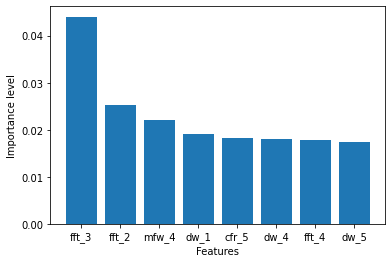

In [15]:
features_dict = dict(zip(cols_no_corr, embeded_rf_selector.estimator_.feature_importances_))
features_dict = dict(sorted(features_dict.items(), key=lambda item: item[1], reverse=True))

best_features = dict()
for index, (key, value) in enumerate(features_dict.items()):
    if index < 8:
        best_features[key] = value

plt.bar(range(len(best_features)), list(best_features.values()), align='center', )
plt.xticks(ticks=range(len(best_features)), labels=best_features.keys())
plt.xlabel('Features')
plt.ylabel('Importance level')
plt.show()

## Filter features

In [16]:
X_fsel = X[embeded_rf_feature]
X_fsel.head()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_6,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15
0,30.571581,30.571114,30.597163,8.654545,1.254944,0.902949,-0.773465,-1.399254,-0.734867,12.762118,...,0.012196,0.047766,-0.052333,0.042084,-0.051954,0.052820,-0.078516,0.018113,-0.033035,-0.008121
1,35.327463,37.090233,36.619925,10.318908,1.501561,0.936195,-0.694743,-1.301387,-0.880195,10.573212,...,0.022624,0.032716,-0.025711,0.004880,-0.014158,0.033816,-0.052615,-0.010039,-0.020460,-0.003424
2,33.754220,34.253945,34.112950,9.653801,1.420377,0.922050,-0.707779,-1.271389,-0.778260,10.515795,...,0.010279,0.036796,-0.041095,0.024671,-0.028207,0.045623,-0.069928,-0.007982,-0.010177,-0.011244
3,33.428166,32.277378,32.154651,9.225828,1.332695,0.898518,-0.728415,-1.302251,-0.708089,11.496901,...,0.005352,0.048697,-0.053417,0.034100,-0.041100,0.034451,-0.060591,-0.005673,-0.010582,-0.020471
4,34.438584,33.565638,33.382364,9.589036,1.426830,0.886530,-0.727896,-1.310174,-0.910833,10.732432,...,-0.003147,0.052752,-0.077430,0.064301,-0.063539,0.066193,-0.087852,0.018333,-0.028678,-0.022301


## Random Forest - 1000x random split

In [17]:
classes = np.unique(label_encoder.inverse_transform(y))

result_df = pd.DataFrame()

split_seeds = random.sample(range(1, 2**32 - 1), 1000)
smote_seeds = random.sample(range(1, 2**32 - 1), 1000)
for i, (split_seed, smote_seed) in enumerate(zip(split_seeds, smote_seeds)):
    start_time = time.time()

    # Train and Test split
    x_train, x_test, y_train, y_test = train_test_split(X_fsel, y, test_size=0.2, random_state=split_seed)
    smote = SMOTE(random_state=smote_seed, n_jobs=THREADS_TO_USE)
    x_smote, y_smote = smote.fit_resample(x_train, y_train)

    # Training
    model = RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE).fit(x_smote, y_smote)

    # Prediction
    y_pred = model.predict(x_test)

    # Decode
    y_test_dec = label_encoder.inverse_transform(y_test)
    y_pred_dec = label_encoder.inverse_transform(y_pred)

    # get metrics
    report = classification_report(y_true=y_test_dec, y_pred=y_pred_dec, output_dict=True)
    specificity = specificity_score(y_true=y_test_dec, y_pred=y_pred_dec, average="weighted")

    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']


    # save result in result_df
    result_df = result_df.append({
        "accuracy": acc,
        "specificity": specificity,
        "precision": precision,
        "recall": recall,
        "f1": f1
     }, ignore_index=True)
    end_time = time.time()

    elapsed_seconds = end_time - start_time
    # Log result
    print("#---------------------#")
    print(i+1, "of", len(split_seeds), "-", elapsed_seconds, "s")
    print("Accuracy", acc, "precision", precision, "specificity", specificity, "recall", recall, "f1", f1)
    print("#---------------------#")

#---------------------#
1 of 1000 - 25.13999891281128 s
Accuracy 0.931021871114037 precision 0.9318856365504441 specificity 0.8879979759386244 recall 0.931021871114037 f1 0.9313883906574394
#---------------------#
#---------------------#
2 of 1000 - 25.414000034332275 s
Accuracy 0.9305098383439397 precision 0.932219875402598 specificity 0.8938476265395888 recall 0.9305098383439397 f1 0.9311632969339931
#---------------------#
#---------------------#
3 of 1000 - 24.96199893951416 s
Accuracy 0.9265598712603321 precision 0.9273733141049257 specificity 0.8774283839121562 recall 0.9265598712603321 f1 0.9269147558630166
#---------------------#
#---------------------#
4 of 1000 - 24.824002981185913 s
Accuracy 0.9263404286445761 precision 0.9276800689278679 specificity 0.8835290024030793 recall 0.9263404286445761 f1 0.9268846924659829
#---------------------#
#---------------------#
5 of 1000 - 25.02999210357666 s
Accuracy 0.9253895106429668 precision 0.927202112086528 specificity 0.88545126173

In [18]:
result_df.head(10)

,accuracy,specificity,precision,recall,f1
0,0.931022,0.887998,0.931886,0.931022,0.931388
1,0.930510,0.893848,0.932220,0.930510,0.931163
2,0.926560,0.877428,0.927373,0.926560,0.926915
3,0.926340,0.883529,0.927680,0.926340,0.926885
4,0.925390,0.885451,0.927202,0.925390,0.926092
5,0.926999,0.884193,0.928324,0.926999,0.927537
6,0.926487,0.884909,0.928121,0.926487,0.927131
7,0.928754,0.887158,0.929935,0.928754,0.929238
8,0.928315,0.880302,0.929318,0.928315,0.928741
9,0.924073,0.883001,0.926086,0.924073,0.924848


In [19]:
print("######## Total ########")
print("Accuracy", result_df["accuracy"].mean())
print("Precision", result_df["precision"].mean())
print("Specificity",  result_df["specificity"].mean())
print("Recall",  result_df["recall"].mean())
print("F1",  result_df["f1"].mean())

result_df.to_csv('result/bin_8beats_smote_1000x_random_split.csv')

######## Total ########
Accuracy 0.9272688903518397
Precision 0.9287637909239836
Specificity 0.8860215807553363
Recall 0.9272688903518397
F1 0.9278590988239862
